In [21]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [5]:
FILEPATH = '/home/jmads/datasets/momentum/active_editors_content_added_8-7-22.csv'

editors_content_df = pd.read_csv(FILEPATH)

In [7]:
editors_content_df[['num_active_editors','num_bytes_added','num_articles','wiki_age']].describe()

,num_active_editors,num_bytes_added,num_articles,wiki_age
count,260.000000,2.600000e+02,2.600000e+02,260.000000
mean,98965.553846,1.295499e+09,1.294018e+07,130.500000
std,53071.385098,1.135499e+09,1.147255e+07,75.199734
min,44.000000,2.993460e+05,1.000000e+00,1.000000
25%,103805.500000,8.094720e+08,9.470810e+05,65.750000
50%,118166.500000,9.153294e+08,1.024438e+07,130.500000
75%,128614.500000,1.628202e+09,2.292147e+07,195.250000
max,190449.000000,6.033403e+09,3.407444e+07,260.000000


In [9]:
editors_content_df[['num_active_editors','num_bytes_added','num_articles','wiki_age']].corr()

,num_active_editors,num_bytes_added,num_articles,wiki_age
num_active_editors,1.000000,0.686205,0.434565,0.573422
num_bytes_added,0.686205,1.000000,-0.223512,-0.084736
num_articles,0.434565,-0.223512,1.000000,0.980269
wiki_age,0.573422,-0.084736,0.980269,1.000000


Text(0.5, 1.0, 'num_articles')

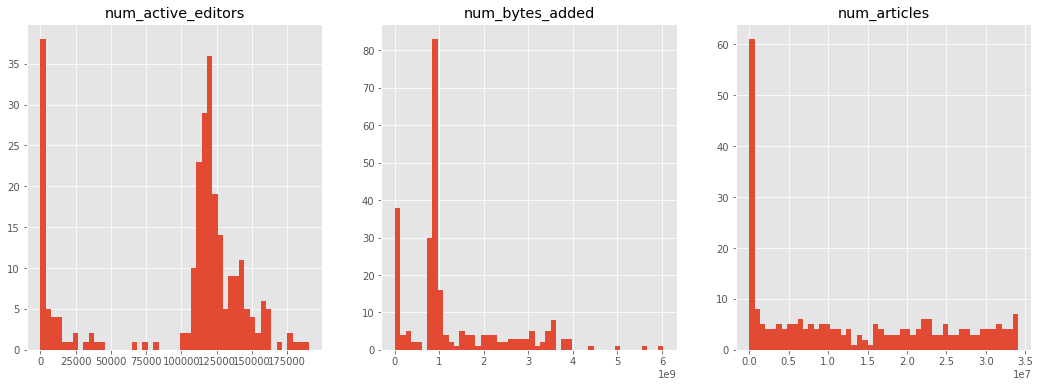

In [58]:
BINS = 50

fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs[0].hist(editors_content_df['num_active_editors'],bins=BINS)
axs[0].set_title('num_active_editors')
axs[1].hist(editors_content_df['num_bytes_added'],bins=BINS)
axs[1].set_title('num_bytes_added')
axs[2].hist(editors_content_df['num_articles'],bins=BINS)
axs[2].set_title('num_articles')

Text(0.5, 1.0, 'num_articles')

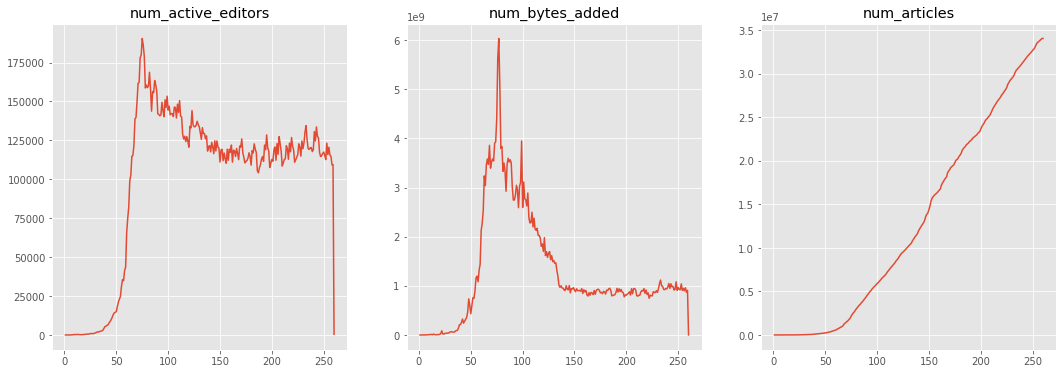

In [38]:
fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs[0].plot(editors_content_df['wiki_age'], editors_content_df['num_active_editors'])
axs[0].set_title('num_active_editors')
axs[1].plot(editors_content_df['wiki_age'], editors_content_df['num_bytes_added'])
axs[1].set_title('num_bytes_added')
axs[2].plot(editors_content_df['wiki_age'], editors_content_df['num_articles'])
axs[2].set_title('num_articles')

In [42]:
FILEPATH = '/home/jmads/datasets/momentum/pageview_new_accounts_8-7-22.csv'

pageview_accounts_df = pd.read_csv(FILEPATH)

In [46]:
pageview_accounts_df[['num_pageviews','num_new_accounts','num_articles','wiki_age']].describe()

,num_pageviews,num_new_accounts,num_articles,wiki_age
count,8.800000e+01,88.000000,8.800000e+01,88.000000
mean,6.193845e+09,58964.613636,2.693821e+07,48.500000
std,6.342356e+08,10322.458533,4.469590e+06,25.547342
min,1.323120e+09,12.000000,1.946427e+07,5.000000
25%,5.997695e+09,54887.750000,2.287272e+07,26.750000
50%,6.200121e+09,60306.000000,2.693764e+07,48.500000
75%,6.398653e+09,65508.000000,3.097195e+07,70.250000
max,7.710673e+09,78009.000000,3.407444e+07,92.000000


In [47]:
pageview_accounts_df[['num_pageviews','num_new_accounts','num_articles','wiki_age']].corr()

,num_pageviews,num_new_accounts,num_articles,wiki_age
num_pageviews,1.000000,0.657678,-0.060431,-0.077839
num_new_accounts,0.657678,1.000000,-0.687091,-0.693602
num_articles,-0.060431,-0.687091,1.000000,0.998886
wiki_age,-0.077839,-0.693602,0.998886,1.000000


Text(0.5, 1.0, 'num_articles')

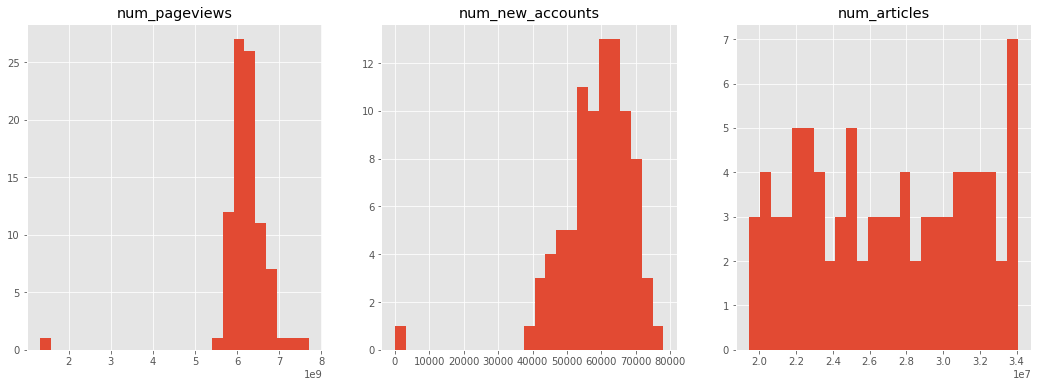

In [60]:
BINS = 25

fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs[0].hist(pageview_accounts_df['num_pageviews'],bins=BINS)
axs[0].set_title('num_pageviews')
axs[1].hist(pageview_accounts_df['num_new_accounts'],bins=BINS)
axs[1].set_title('num_new_accounts')
axs[2].hist(pageview_accounts_df['num_articles'],bins=BINS)
axs[2].set_title('num_articles')

Text(0.5, 1.0, 'num_articles')

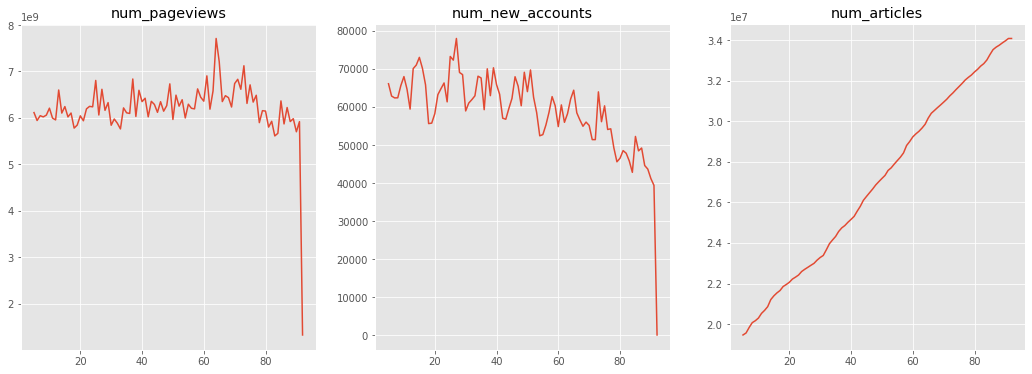

In [54]:
fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs[0].plot(pageview_accounts_df['wiki_age'],pageview_accounts_df['num_pageviews'])
axs[0].set_title('num_pageviews')
axs[1].plot(pageview_accounts_df['wiki_age'],pageview_accounts_df['num_new_accounts'])
axs[1].set_title('num_new_accounts')
axs[2].plot(pageview_accounts_df['wiki_age'],pageview_accounts_df['num_articles'])
axs[2].set_title('num_articles')